In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

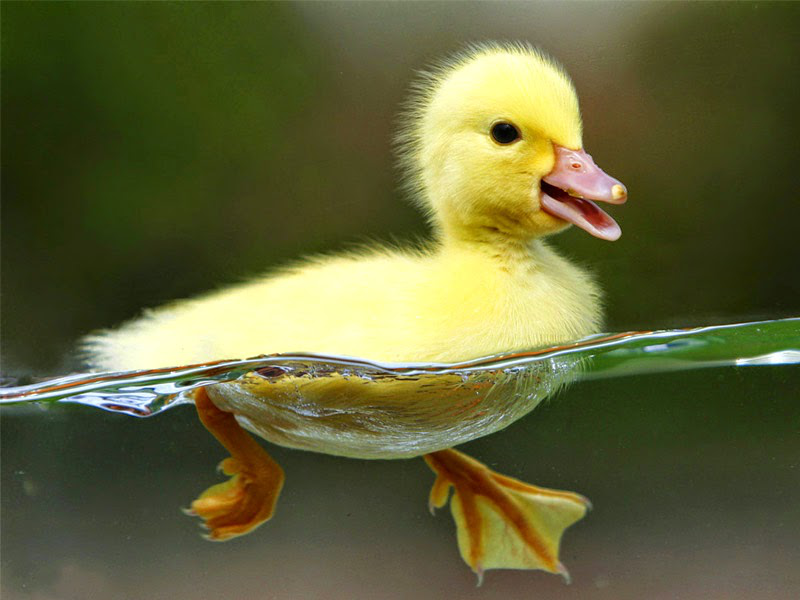

In [2]:
filename = 'input/bebek.jpg'

image = Image.open(filename)
image

In [3]:
pixel = np.array(image)
pixel.shape
pixel.dtype

dtype('uint8')

In [47]:
# Array of pixels to be calculated in histogram
pixel_r = np.zeros(pixel.shape[0:2], pixel.dtype)
pixel_g = np.zeros(pixel.shape[0:2], pixel.dtype)
pixel_b = np.zeros(pixel.shape[0:2], pixel.dtype)
pixel_gray = np.zeros(pixel.shape[0:2], pixel.dtype)

pixel_r_flat = np.zeros(256, 'uint64')
pixel_g_flat = np.zeros(256, 'uint64')
pixel_b_flat = np.zeros(256, 'uint64')
pixel_gray_flat = np.zeros(256, 'uint64')

In [48]:
for i, row in enumerate(pixel):
    for j, pix in enumerate(row):
        pixel_r[i][j] = pix[0]
        pixel_g[i][j] = pix[1]
        pixel_b[i][j] = pix[2]
        pixel_gray[i][j] = np.uint8(pix.mean())
        
        pixel_r_flat[pixel_r[i][j]] += 1
        pixel_g_flat[pixel_g[i][j]] += 1
        pixel_b_flat[pixel_b[i][j]] += 1
        pixel_gray_flat[pixel_gray[i][j]] += 1

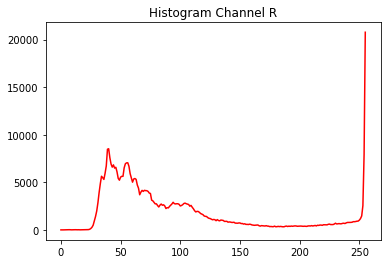

In [71]:
plt.plot(pixel_r_flat, color='red')  # arguments are passed to np.histogram
plt.title("Histogram Channel R")
plt.show()

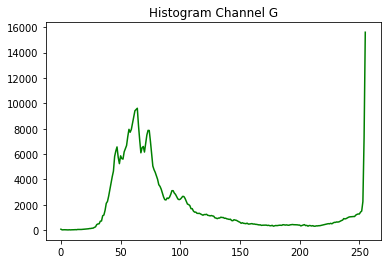

In [72]:
plt.plot(pixel_g_flat, color='green')  # arguments are passed to np.histogram
plt.title("Histogram Channel G")
plt.show()

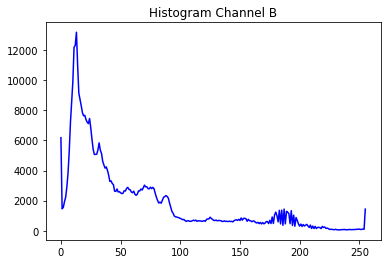

In [73]:
plt.plot(pixel_b_flat, color='blue')  # arguments are passed to np.histogram
plt.title("Histogram Channel B")
plt.show()

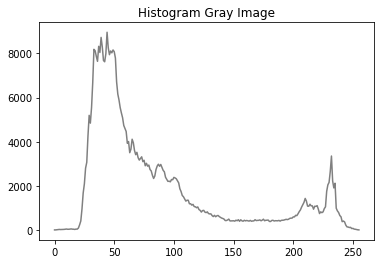

In [74]:
plt.plot(pixel_gray_flat, color='gray')  # arguments are passed to np.histogram
plt.title("Histogram Gray Image")
plt.show()

## ALU

### Grayscale

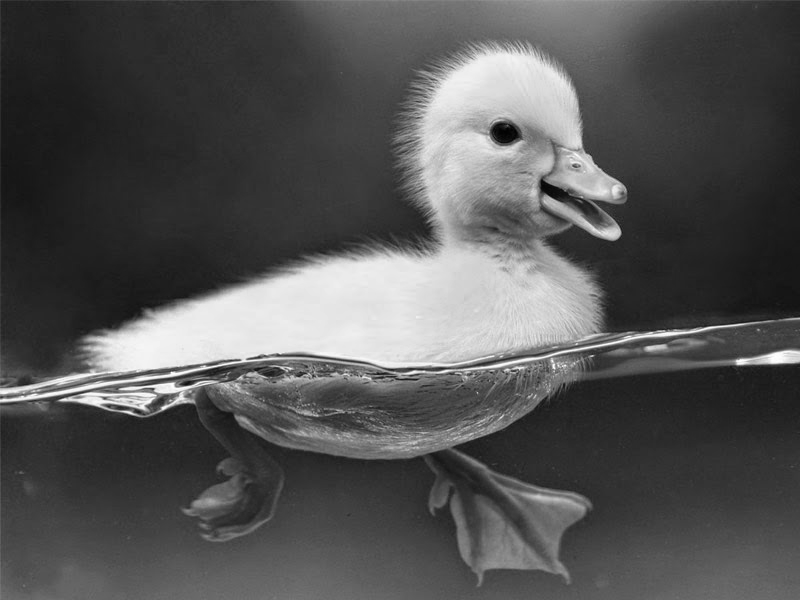

In [61]:
# grayscale
image_gray = Image.fromarray(pixel_gray)
image_gray

In [77]:
pixel_gray_flat_cumsum = pixel_gray_flat.cumsum()

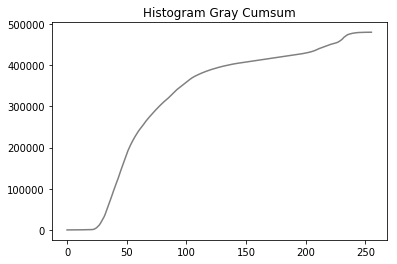

In [75]:
plt.plot(pixel_gray_flat_cumsum, color='gray')  # arguments are passed to np.histogram
plt.title("Histogram Gray Cumsum")
plt.show()

In [78]:
alu_gray = np.zeros(256, dtype="uint8")
pixel_number = pixel_gray_flat_cumsum[-1]

for old_color in range(256):
    mapped_color = 255 * pixel_gray_flat_cumsum[old_color] / pixel_number
    alu_gray[old_color] = int(mapped_color)

In [81]:
pixel_gray_alu = pixel_gray.copy()
pixel_gray_alu_flat = np.zeros(256,'uint64')
for i, row in enumerate(pixel_gray_alu):
    for j, pix in enumerate(row):
        pixel_gray_alu[i][j] = alu_gray[pixel_gray_alu[i][j]]
        pixel_gray_alu_flat[pixel_gray_alu[i][j]] += 1

In [82]:
pixel_gray_alu_flat_cumsum = pixel_gray_alu_flat.cumsum()

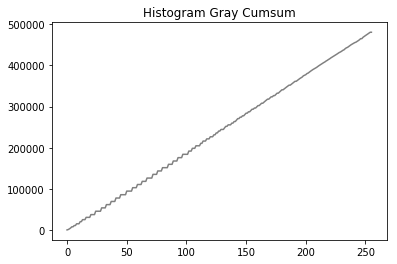

In [83]:
plt.plot(pixel_gray_alu_flat_cumsum, color='gray')  # arguments are passed to np.histogram
plt.title("Histogram Gray Cumsum")
plt.show()

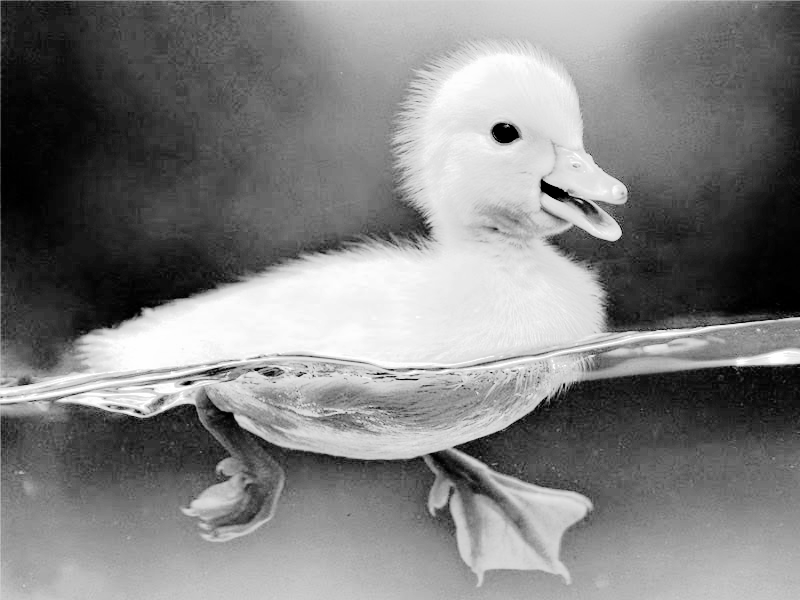

In [80]:
image_gray_alu = Image.fromarray(pixel_gray_alu)
image_gray_alu

### Color

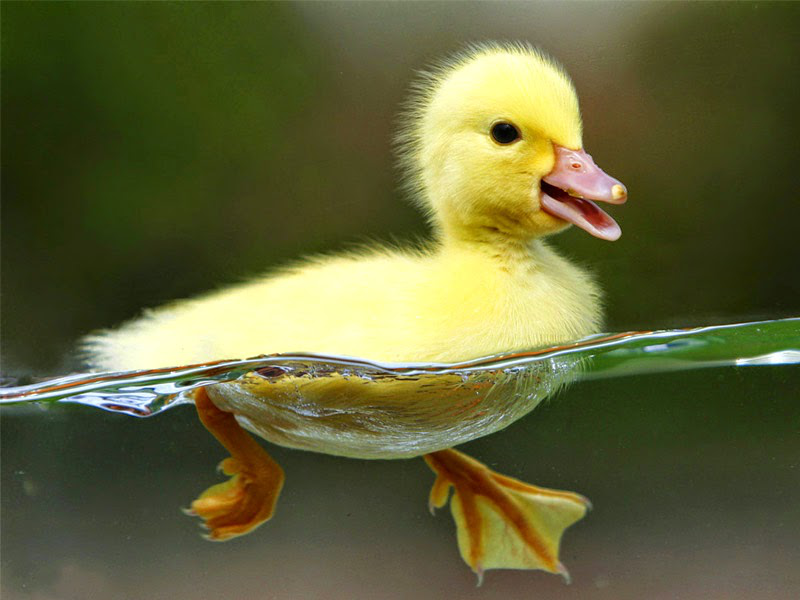

In [90]:
image

In [94]:
pixel_r_flat_cumsum = pixel_r_flat.cumsum()
pixel_g_flat_cumsum = pixel_g_flat.cumsum()
pixel_b_flat_cumsum = pixel_b_flat.cumsum()

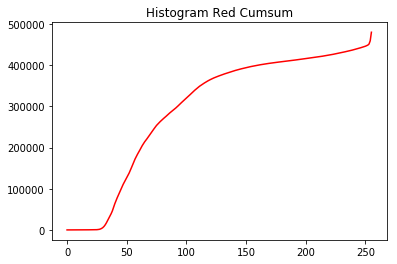

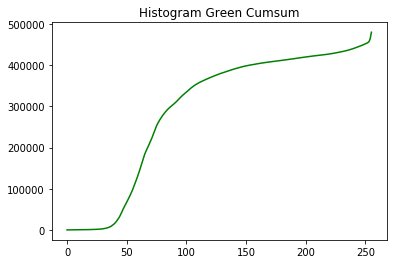

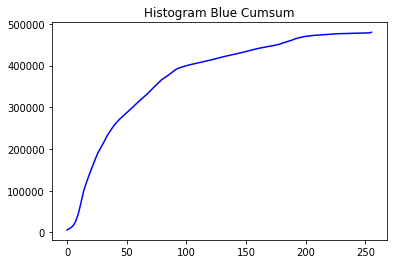

In [95]:
plt.plot(pixel_r_flat_cumsum, color='red')  # arguments are passed to np.histogram
plt.title("Histogram Red Cumsum")
plt.show()
plt.plot(pixel_g_flat_cumsum, color='green')  # arguments are passed to np.histogram
plt.title("Histogram Green Cumsum")
plt.show()
plt.plot(pixel_b_flat_cumsum, color='blue')  # arguments are passed to np.histogram
plt.title("Histogram Blue Cumsum")
plt.show()

In [96]:
alu_r = np.zeros(256, dtype="uint8")
alu_g = np.zeros(256, dtype="uint8")
alu_b = np.zeros(256, dtype="uint8")
pixel_number = pixel_r_flat_cumsum[-1]

for old_color in range(256):
    mapped_color = 255 * pixel_r_flat_cumsum[old_color] / pixel_number
    alu_r[old_color] = int(mapped_color)
    mapped_color = 255 * pixel_g_flat_cumsum[old_color] / pixel_number
    alu_g[old_color] = int(mapped_color)
    mapped_color = 255 * pixel_b_flat_cumsum[old_color] / pixel_number
    alu_b[old_color] = int(mapped_color)

In [97]:
pixel_r_alu = pixel_r.copy()
pixel_g_alu = pixel_g.copy()
pixel_b_alu = pixel_b.copy()

pixel_r_alu_flat = np.zeros(256,'uint64')
pixel_g_alu_flat = np.zeros(256,'uint64')
pixel_b_alu_flat = np.zeros(256,'uint64')

for i, row in enumerate(pixel_r_alu):
    for j, pix in enumerate(row):
        pixel_r_alu[i][j] = alu_r[pixel_r_alu[i][j]]
        pixel_g_alu[i][j] = alu_g[pixel_g_alu[i][j]]
        pixel_b_alu[i][j] = alu_b[pixel_b_alu[i][j]]
        
        pixel_r_alu_flat[pixel_r_alu[i][j]] += 1
        pixel_g_alu_flat[pixel_g_alu[i][j]] += 1
        pixel_b_alu_flat[pixel_b_alu[i][j]] += 1

In [99]:
pixel_r_alu_flat_cumsum = pixel_r_alu_flat.cumsum()
pixel_g_alu_flat_cumsum = pixel_g_alu_flat.cumsum()
pixel_b_alu_flat_cumsum = pixel_b_alu_flat.cumsum()

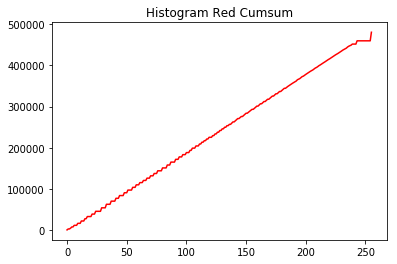

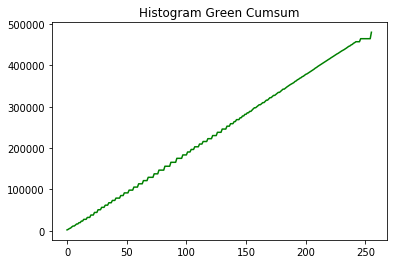

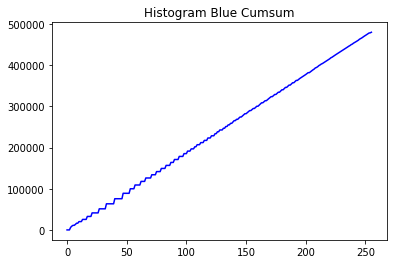

In [100]:
plt.plot(pixel_r_alu_flat_cumsum, color='red')  # arguments are passed to np.histogram
plt.title("Histogram Red Cumsum")
plt.show()
plt.plot(pixel_g_alu_flat_cumsum, color='green')  # arguments are passed to np.histogram
plt.title("Histogram Green Cumsum")
plt.show()
plt.plot(pixel_b_alu_flat_cumsum, color='blue')  # arguments are passed to np.histogram
plt.title("Histogram Blue Cumsum")
plt.show()

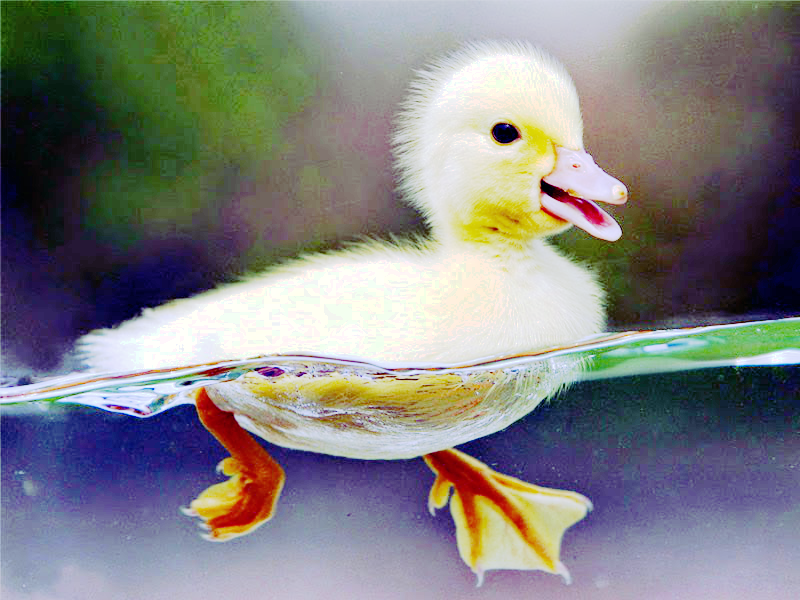

In [107]:
image_alu_pixel = []
for row in range(pixel.shape[0]):
    row_pixel = []
    for column in range(pixel.shape[1]):
        row_pixel.append([pixel_r_alu[row][column], pixel_g_alu[row][column], pixel_b_alu[row][column]])
    image_alu_pixel.append(row_pixel)
image_alu_pixel = np.array(image_alu_pixel)
    
Image.fromarray(image_alu_pixel)